In [25]:
import numpy as np 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [26]:
(x_train2,y_train), (x_test,y_test) = datasets.cifar10.load_data()

x_train2.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [27]:
x_test.shape

(10000, 32, 32, 3)

In [28]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [29]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [30]:
y_train[:78]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3,
       6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7,
       1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1,
       4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0], dtype=uint8)

In [31]:
y_test  = y_test.reshape(-1,)

In [32]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [33]:
def any(y, index):
    print(classes[y[index]])
any(y_train, 7)

horse


In [34]:
def plot_images(x, y, index):
    plt.figure(figsize = (7,4))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

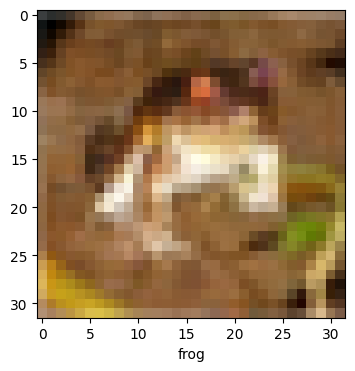

In [35]:
plot_images(x_train2, y_train, 0)

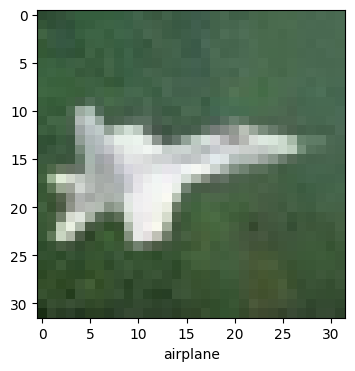

In [36]:
plot_images(x_train2, y_train, 77)

In [37]:
x_train = x_train2/255
x_test = x_test / 255


In [38]:
ann  = models.Sequential([
        layers.Flatten(input_shape = (32,32,3)),
        layers.Dense(3000, activation = 'relu'),
        layers.Dense(1000, activation = 'relu'),
        layers.Dense(10,activation = 'sigmoid')
    ])
ann.compile(optimizer='SGD',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
ann.fit(x_train,y_train, epochs =5 )


C:\Users\suhai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.3002 - loss: 1.9413
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4217 - loss: 1.6406
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4499 - loss: 1.5487
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4755 - loss: 1.4875
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4917 - loss: 1.4315


In [39]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4862 - loss: 1.4523


[1.4637008905410767, 0.47769999504089355]

In [40]:
#the artificial nueral network is showing pretty low accuracy 

In [41]:
from sklearn.metrics import confusion_matrix , classification_report 
y_pred =ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification Report:\n' , classification_report(y_test, y_pred_classes))
                  

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
classification Report:
               precision    recall  f1-score   support

           0       0.66      0.44      0.53      1000
           1       0.68      0.55      0.61      1000
           2       0.36      0.38      0.37      1000
           3       0.34      0.34      0.34      1000
           4       0.58      0.16      0.25      1000
           5       0.43      0.30      0.35      1000
           6       0.35      0.81      0.49      1000
           7       0.57      0.54      0.56      1000
           8       0.56      0.70      0.62      1000
           9       0.57      0.56      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



In [42]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\suhai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3767 - loss: 1.7198
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5884 - loss: 1.1610
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6526 - loss: 1.0013
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6830 - loss: 0.9170
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7041 - loss: 0.8519
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7245 - loss: 0.7924
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7419 - loss: 0.7412
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7527 - loss: 0.7087
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7689 - loss: 0.6700
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7819 - loss: 0.6288


In [44]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6999 - loss: 0.9254


[0.9374233484268188, 0.6942999958992004]

In [45]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.42668786e-03, 4.26432001e-04, 1.70354231e-03, 8.98459196e-01,
        5.21161593e-04, 8.19064826e-02, 7.24684168e-03, 1.15453804e-04,
        6.29558228e-03, 8.98620638e-04],
       [4.08468302e-03, 7.35708475e-02, 7.31373848e-06, 1.76807680e-05,
        3.21652976e-07, 6.01662578e-07, 2.78645622e-08, 2.08178444e-05,
        9.21223938e-01, 1.07374205e-03],
       [5.36386184e-02, 2.34994546e-01, 2.62749410e-04, 5.94462315e-03,
        3.79440864e-03, 1.04272133e-03, 2.46713054e-04, 1.39013212e-03,
        5.15074432e-01, 1.83611050e-01],
       [5.15951633e-01, 3.61436009e-02, 1.86440408e-01, 2.73809992e-02,
        1.32411700e-02, 1.60725263e-04, 4.60747600e-04, 1.01265777e-03,
        2.18767509e-01, 4.40615084e-04],
       [6.69343262e-06, 1.49239349e-06, 1.09540354e-02, 8.29500612e-03,
        7.38472164e-01, 3.87835014e-03, 2.38373101e-01, 1.42392150e-06,
        1.47229775e-05, 3.06154402e-06]], dtype=float32)

In [46]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [47]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

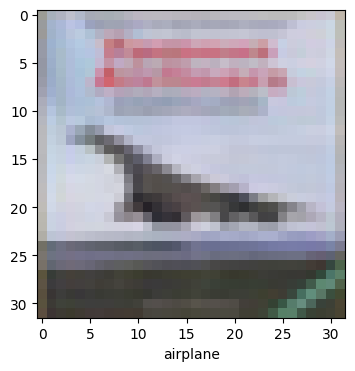

In [48]:
import matplotlib.pyplot as plt
plot_images(x_test, y_test,3)